In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as axis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm



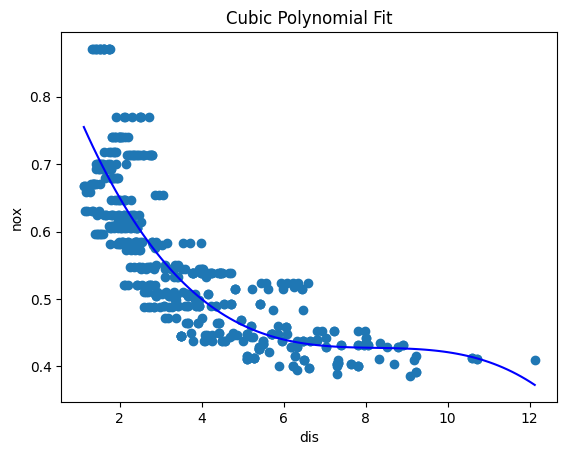

[np.float64(2.7685628589692755), np.float64(2.035261868935257), np.float64(1.9341067071790703), np.float64(1.932981327298594), np.float64(1.915289961084304), np.float64(1.8782572985081623), np.float64(1.8494836145830096), np.float64(1.8356296890678592), np.float64(1.83333080451889), np.float64(1.838304983221962)]


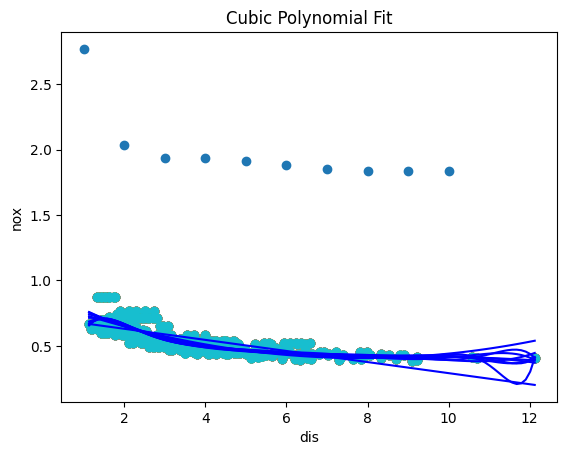

In [62]:
#Question 3a
#Loading data
df = pd.read_csv("Boston.csv")
#storing x and y 
x = df['dis'].values.reshape(-1,1)
y = df['nox'].values
#creating and fitting polynomial model
poly_1 = PolynomialFeatures( degree = 3)
X_fit1 = poly_1.fit_transform(x)
model1 = LinearRegression().fit(X_fit1, y)
y_pred = model1.predict(X_fit1)

#creating plot 
plt.scatter(x, y)
range_x = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
plt.plot(range_x, model1.predict(poly_1.transform(range_x)), color = 'blue')
plt.xlabel("dis")
plt.ylabel("nox")
plt.title("Cubic Polynomial Fit")
plt.show()

#part b
degrees = range(1, 11)
list_of_rss = []
#fitting for each degree
for i in degrees:
    poly_2 = PolynomialFeatures(degree = i)
    X_fit1 = poly_2.fit_transform(x)
    model1 = LinearRegression().fit(X_fit1, y)
    y_pred = model1.predict(X_fit1)
    #calculating rss
    rss = np.sum((y - y_pred)**2)
    list_of_rss.append(rss)
    #creating each plot with different degree
    plt.scatter(x, y)
    range_x = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    plt.plot(range_x, model1.predict(poly_2.transform(range_x)), color = 'blue')
    plt.xlabel("dis")
    plt.ylabel("nox")
    plt.title("Cubic Polynomial Fit")
    #plt.show()

axis.scatter(degrees, list_of_rss)
axis.show


print(list_of_rss)






In [63]:
#part c

#Using Sklearn cross validation package...
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits = 10)
testmse_list = []

for i in degrees:
    poly3 = PolynomialFeatures(degree = i)
    X_fit3 = poly3.fit_transform(x)
    model3 = LinearRegression().fit(X_fit3, y)
    #for different socring methods, learned that using negative mse seems to be best option in this scenario
    negative_mse = cross_val_score(model3, X_fit3, y, scoring='neg_mean_squared_error', cv=cv)
    mean_mse = -negative_mse.mean()
    testmse_list.append(mean_mse)
print(min(testmse_list)) # mininum corresponds with cubic degree(3)
print(testmse_list)

#Interpretation- the ,omi,u, test MSE occurs at degree 3, which is a cubic polynomial fit. This shows that 
#the cubic fits the data best without adding extra uncecessary complexity. 

0.004222893611150259
[np.float64(0.006100015964224095), np.float64(0.004436912163053268), np.float64(0.004222893611150259), np.float64(0.005732179720093996), np.float64(0.01349463760409857), np.float64(0.10566984766158247), np.float64(0.199544170984908), np.float64(1.5325678720935534), np.float64(0.6397005833915762), np.float64(41.31573236112149)]


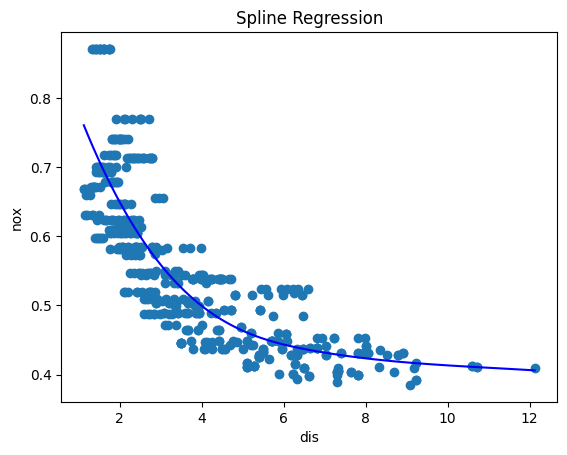

In [64]:
#part d

#Again usign Skleanr, this time to aid in spline 
#I chose 2 
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline


spline = make_pipeline(SplineTransformer(degree=3, n_knots=3, include_bias=True),LinearRegression())
spline.fit(x, y)
y_predspline = spline.predict(x)

plt.scatter(x, y)
range_x = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
plt.plot(range_x, spline.predict(range_x), color = 'blue')
plt.xlabel("dis")
plt.ylabel("nox")
plt.title("Spline Regression")
plt.show()


In [65]:
#part e
list_of_splinerss = []
dof = [2, 3, 4, 5, 6,7] #various degrees of freedom 
for i in dof: 
    spline = make_pipeline(SplineTransformer(degree=3, n_knots=i, include_bias=True),LinearRegression())
    spline.fit(x, y)
    y_predspline = spline.predict(x)
    rss = np.sum((y - y_predspline)**2)
    list_of_splinerss.append(rss)

print(list_of_splinerss)
#Observation- I noticed as the degrees of freedom incresed, the rss decreased

    
    



[np.float64(1.9341067071790703), np.float64(1.9299413489115642), np.float64(1.9273957244358217), np.float64(1.9027819659825194), np.float64(1.8731229643520642), np.float64(1.8519807395240218)]


In [66]:
#part f

#Using similar cross validation process as above, only now with splines
spline_testmse_list = []
for i in dof: 
    spline = make_pipeline(SplineTransformer(degree=3, n_knots=i, include_bias=True),LinearRegression())
    negative_mse = cross_val_score(spline, x, y, scoring='neg_mean_squared_error', cv=cv)
    mean_mse = -negative_mse.mean()
    spline_testmse_list.append(mean_mse)
print(min(spline_testmse_list))
print(spline_testmse_list)
#Interpretation: Similar to part c, around degree 2 and 3 is where we get lowest test MSE, showing that additonal flexibility
# does not help the fit, and actually could even result in an overfit. 




0.004202246325705414
[np.float64(0.004202246325705414), np.float64(0.004424723266439258), np.float64(0.0046886629665803935), np.float64(0.004812470375523103), np.float64(0.004825747001881967), np.float64(0.004815211577445315)]


/Users/chimaoparaji/torch_env/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


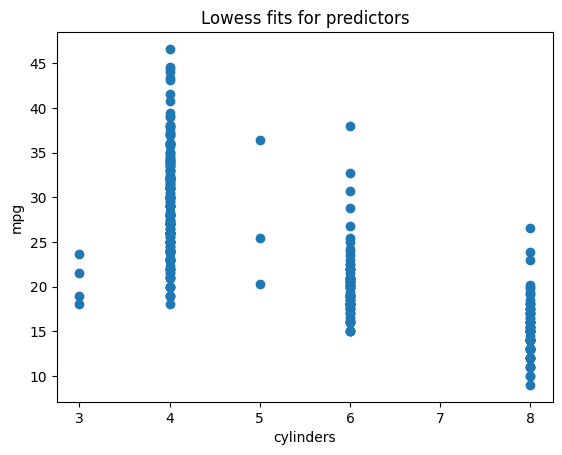

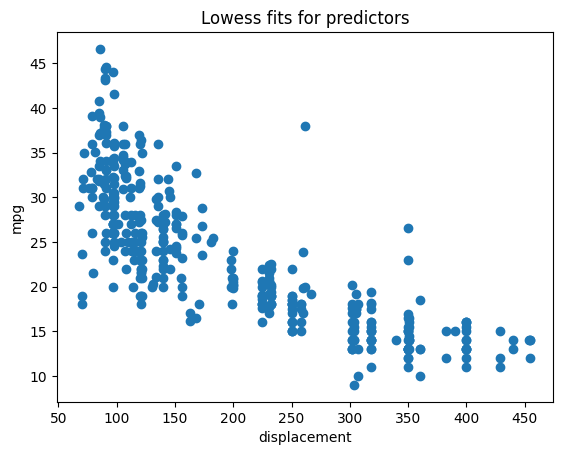

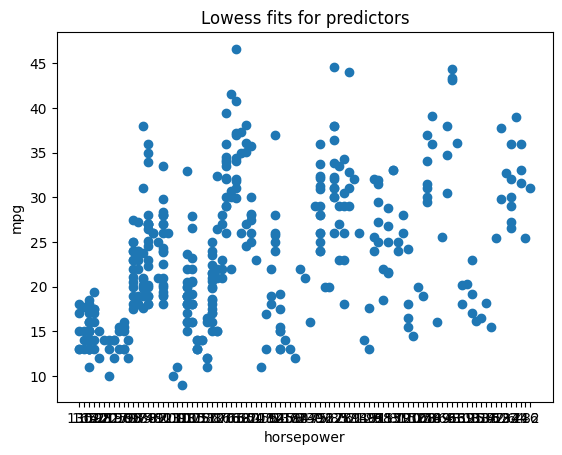

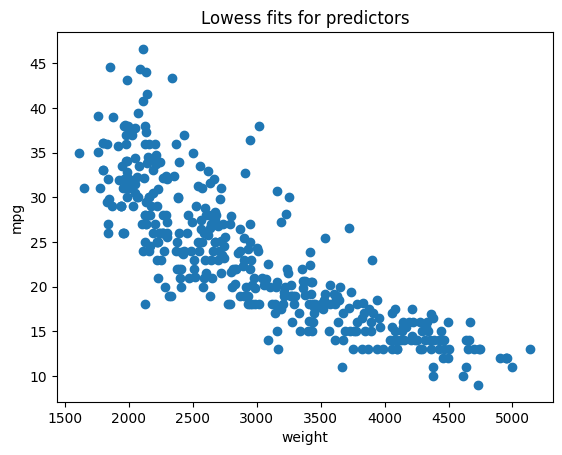

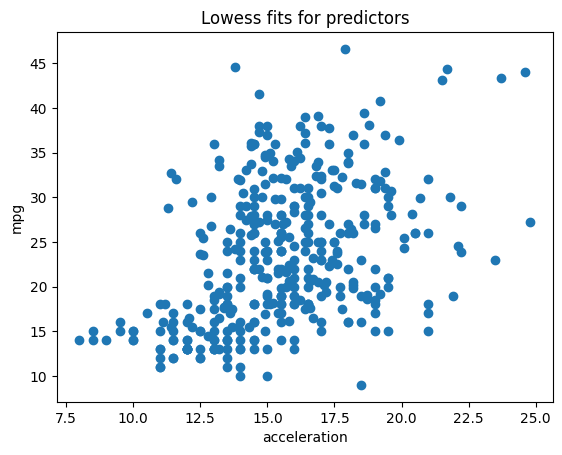

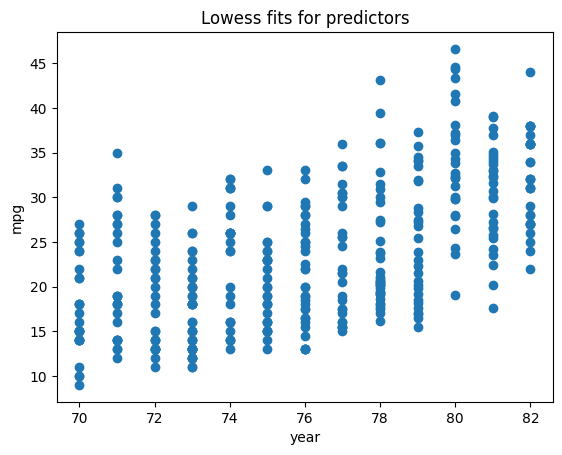

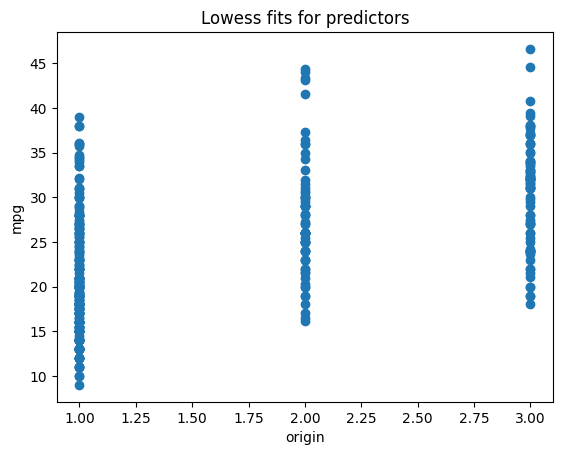

In [67]:
#Question 4 
#Loading data(and cleaning it)
df = pd.read_csv("Auto.csv")
df = df.replace('?', np.nan)
df = df.dropna().reset_index(drop=True)
#storing x and y 
predictors = ['cylinders', 'displacement', 'horsepower', 'weight' ,'acceleration', 'year', 'origin']
x = df[predictors]
y = df['mpg'].values

from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.datasets import fetch_openml

spans = [0.1, 0.3, 0.4, 0.5]
lowess_models = []
#plt.figure()
#plt.scatter(x, y, label='Data')
for j in predictors:
    #fitting local linear regression for each span
    plt.scatter(x[j], y)
    for i in spans: 
        lowess_fit = lowess(y, x[j], i)
        lowess_models.append(lowess_fit)
    plt.xlabel(j)
    plt.ylabel('mpg')
    plt.title('Lowess fits for predictors')
    plt.show()


        
    
#print(lowess_models)


In [59]:
#4B
from patsy import dmatrix # using this for natural splines 
from sklearn.compose import ColumnTransformer
from statsmodels.gam.api import GLMGam, BSplines # helps with smoothing splines 
from sklearn.preprocessing import StandardScaler # tool for standardizing predictors

#natural model
natural_fit =[]
numeric_predictors = df.select_dtypes(include=np.number).columns.drop('mpg') # keep text data out of this 

for i in numeric_predictors: 
        #learned that this creates natural spline basis for each predictor
        transformed_x = dmatrix(f"cr({i}, df=4)", data=df, return_type='dataframe')
        model = sm.OLS(y, transformed_x).fit()
        natural_fit.append(model.fittedvalues)

        
        

#Before making splines, I'm standardizing predictors to avoid scaling issues 

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

b = BSplines(x_scaled, [5,5,5,5,5,5,5],[3,3,3,3,3,3,3])
#fitting smoothing spline model 
gam = GLMGam(y, exog=x_scaled, smoother=b).fit()

print(gam.summary())





                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  392
Model:                         GLMGam   Df Residuals:                   365.00
Model Family:                Gaussian   Df Model:                        26.00
Link Function:               Identity   Scale:                          6.6839
Method:                         PIRLS   Log-Likelihood:                -914.58
Date:                Tue, 04 Nov 2025   Deviance:                       2439.6
Time:                        21:46:32   Pearson chi2:                 2.44e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9997
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3502      0.940      1.436      0.1

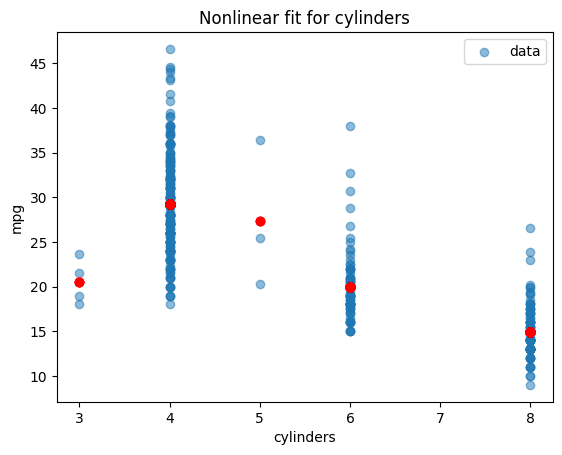

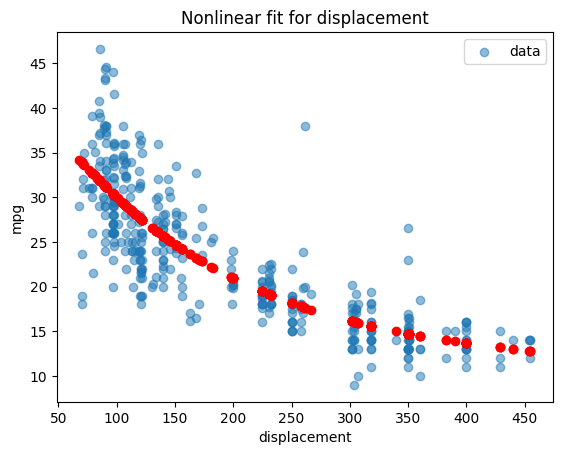

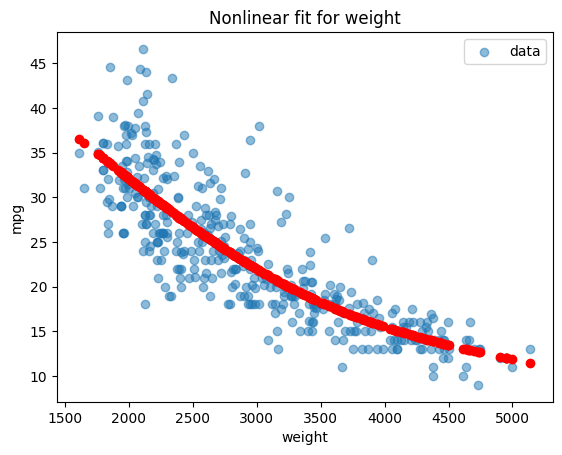

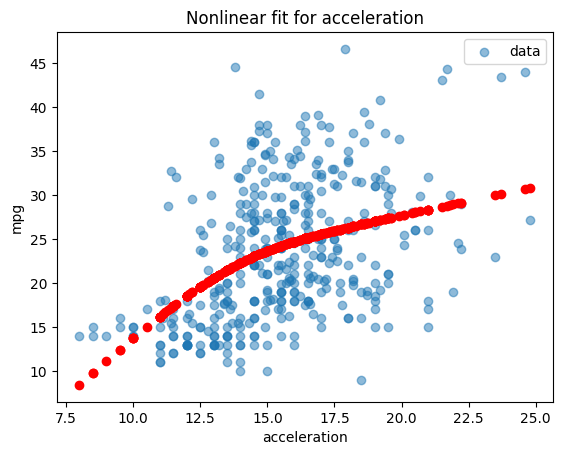

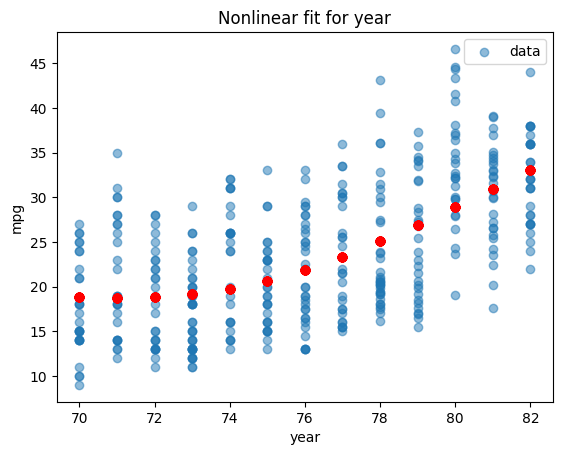

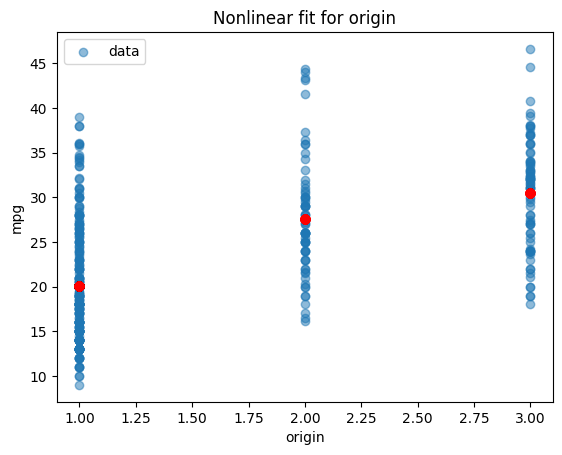

In [51]:
#4c

for i, pred in enumerate(numeric_predictors): 
    plt.figure()
    plt.scatter(df[pred], y, label="data", alpha=0.5)
    plt.scatter(df[pred], natural_fit[i], color="red")
    plt.xlabel(pred)
    plt.ylabel("mpg")
    plt.legend()
    plt.title(f"Nonlinear fit for {pred}")
    plt.show()

#Answer-yes there is evidence of non-linear relationships in this dataset- as we can see very cearly,the natural spline fit is
#looks somehwat quadratic for both weight and acceleration predictors 

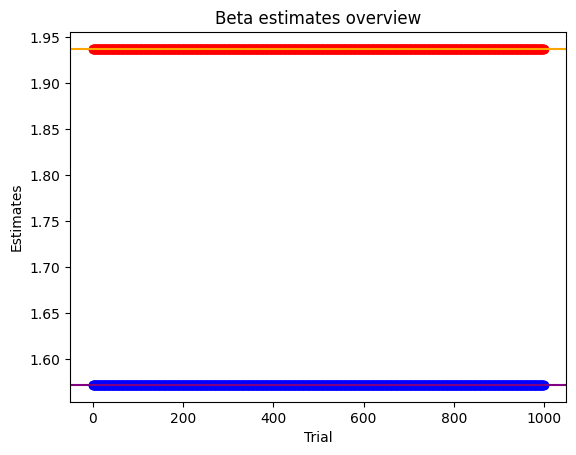

In [70]:
#Question 5 

#part a 
np.random.seed
#initiliazing values 
N = 100
beta1 = 2
beta2 = 1.5

x1 = np.random.normal(0, 1, N)
x2 = np.random.normal(0,1, N)

e = np.random.normal(0, 1, N)

y = (beta1 * x1) + (beta2 * x2) + e

#part b
beta1_estimate = 0.5
beta2_estimate = 0 #purely for initlization
#part c - fitting beta2
#essentially using ols solution... to iterate over this model
denom = np.sum(x1**2)
denom2 = np.sum(x2**2)

num2 = np.sum(x2 * (y - beta1_estimate * x1))
beta2_estimate = num2/denom2
#part d - updating fit for beta1
num = np.sum(x1 * (y - beta2_estimate * x2))
beta1_estimate = num/denom 

#part e
list_of_beta1 = []
list_of_beta2 = []
#essentially doing same thing as before, now with many iterations and storing estiamtes in list
for i in range(1000):
    num2 = np.sum(x2 * (y - beta1_estimate * x1))
    beta2_estimate = num2/denom2

    num = np.sum(x1 * (y - beta2_estimate * x2))
    beta1_estimate = num/denom

    list_of_beta2.append(beta2_estimate)
    list_of_beta1.append(beta1_estimate)
fig, ax = plt.subplots()
range_x = np.linspace(0, 999, 1000)

ax.scatter(range_x, list_of_beta1, color = 'red')
ax.scatter(range_x, list_of_beta2, color='blue')



#part f
x = np.column_stack((x1, x2))
ols_sol = np.linalg.inv(x.T @ x) @ (x.T @ y)


ax.plot(range_x, list_of_beta1, color = 'red')
ax.plot(range_x, list_of_beta2, color='blue')

ax.axhline( ols_sol[0], color = 'orange')
ax.axhline( ols_sol[1], color='purple')

ax.set_xlabel("Trial")
ax.set_ylabel("Estimates")
ax.set_title("Beta estimates overview")
plt.show()

#Answer: Comparing the two plots, it seems as though the backfitting converges to the OLS as we do more iterations.





    
    

In [68]:
#part g 
#Here we can define "good" as meaning that the estimate we obtain by doing multiple linear regression is within 
# .01 of estimate we obtain from OLS - so their absolute difference should be less than .0001(for both estimates)
for i in range(1000):
    if abs(list_of_beta1[i] - ols_sol[0]) < .0001 and abs(list_of_beta2[i] - ols_sol[1]) < .0001:
        print(list_of_beta1[i])
        print(list_of_beta2[i])
        print( i + 1 ) 


        break

1.9364391672218566
1.5545302921751083
2


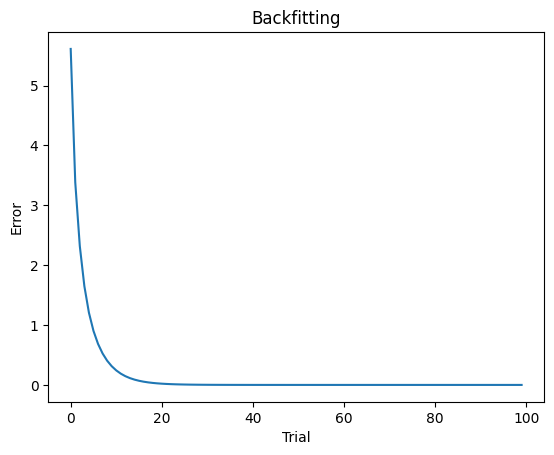

In [44]:

#part h 
np.random.seed(2)
N = 200
p = 100

x = np.random.randn(N, p) # X matrix comprised of random values
betas = np.random.randn(p) # true beta values (also random)
e = np.random.randn(N)
y = x @ betas + e 

initial_betas = np.zeros(p)
errors = []
ols_sol = np.linalg.inv(x.T @ x) @ (x.T @ y)
for i in range(100):
    for j in range(p):
        #computing residual, not including current predictor
        y_pred = x @ initial_betas
        resid = y - y_pred + initial_betas[j] * x[:, j]
        #updating current predictor 
        initial_betas[j] = np.sum(resid * x[:,j])/ np.sum(x[:, j] ** 2)
    #using  2 norm to keep track of distance from OLS 
    error = np.linalg.norm(initial_betas - ols_sol)
    errors.append(error)

plt.plot(errors)
plt.xlabel("Trial")
plt.ylabel("Error")
plt.title("Backfitting")
plt.show()
    
#I would say around 15 backfittings is enough to get a good answer, as the graph shows by trial 15ish
#the error(calcualting the distance between the two solutions) tends to 0